## Netlfix Exploratory Data Analysis

![netflix](img.jpeg)

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import missingno as mno

%matplotlib inline

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv', index_col = False)

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


<AxesSubplot:>

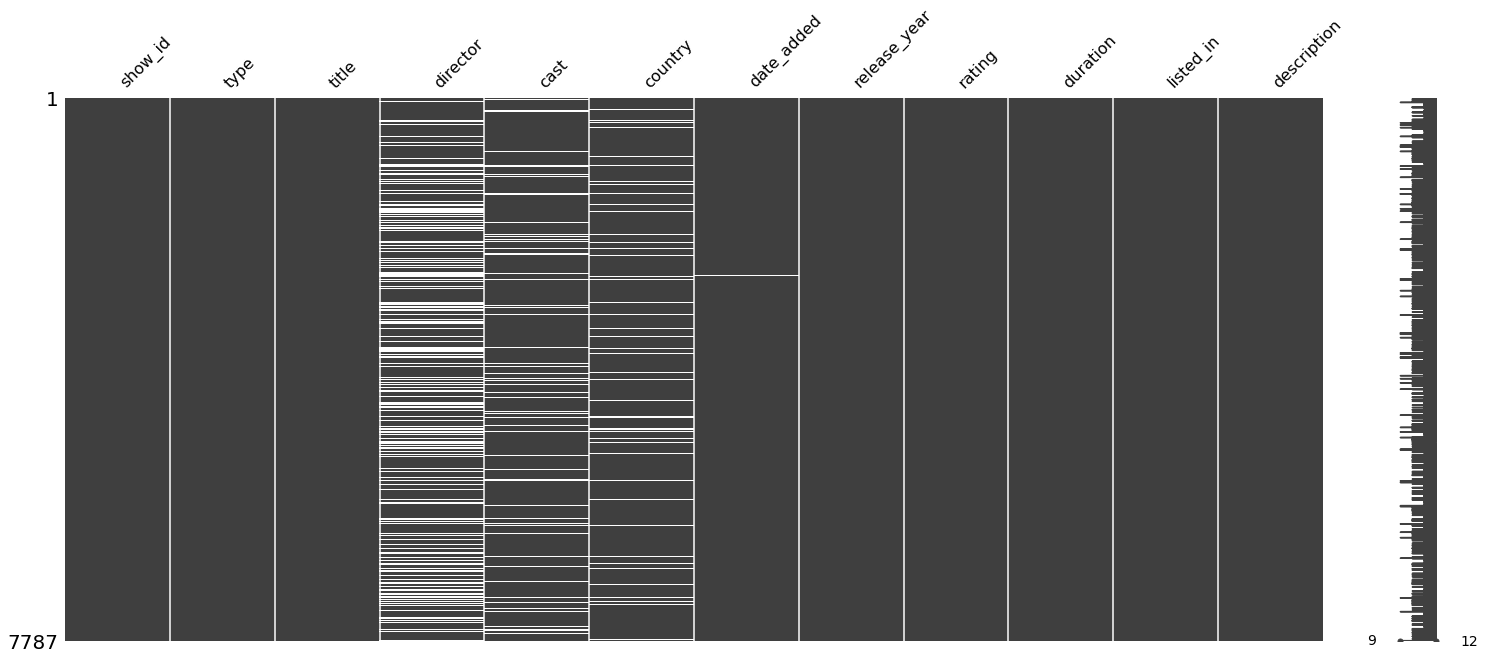

In [4]:
mno.matrix(netflix_df)

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
# removing show_id because it provides no insights and also removing director and cast becuase of high NaN
clean_df = netflix_df.drop(['show_id','director','cast'], axis = 1)

In [8]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   country       7280 non-null   object
 3   date_added    7777 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   duration      7787 non-null   object
 7   listed_in     7787 non-null   object
 8   description   7787 non-null   object
dtypes: int64(1), object(8)
memory usage: 547.6+ KB


In [9]:
clean_df['year'] = pd.DatetimeIndex(clean_df['date_added']).year.fillna(2009).astype('object')
# filling 10 NaN values from TV Shows to 2009 which was a year that actually had 0 TV Shows added
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   country       7280 non-null   object
 3   date_added    7777 non-null   object
 4   release_year  7787 non-null   int64 
 5   rating        7780 non-null   object
 6   duration      7787 non-null   object
 7   listed_in     7787 non-null   object
 8   description   7787 non-null   object
 9   year          7787 non-null   object
dtypes: int64(1), object(9)
memory usage: 608.5+ KB


In [10]:
movies = clean_df.loc[clean_df.type == 'Movie']

In [11]:
tv_shows = clean_df.loc[clean_df.type == 'TV Show']

In [12]:
tv_country = tv_shows['country'].value_counts()[tv_shows['country'].value_counts(normalize=True)>0.005]
tv_country_list = list(tv_country.index)

<function matplotlib.pyplot.show(close=None, block=None)>

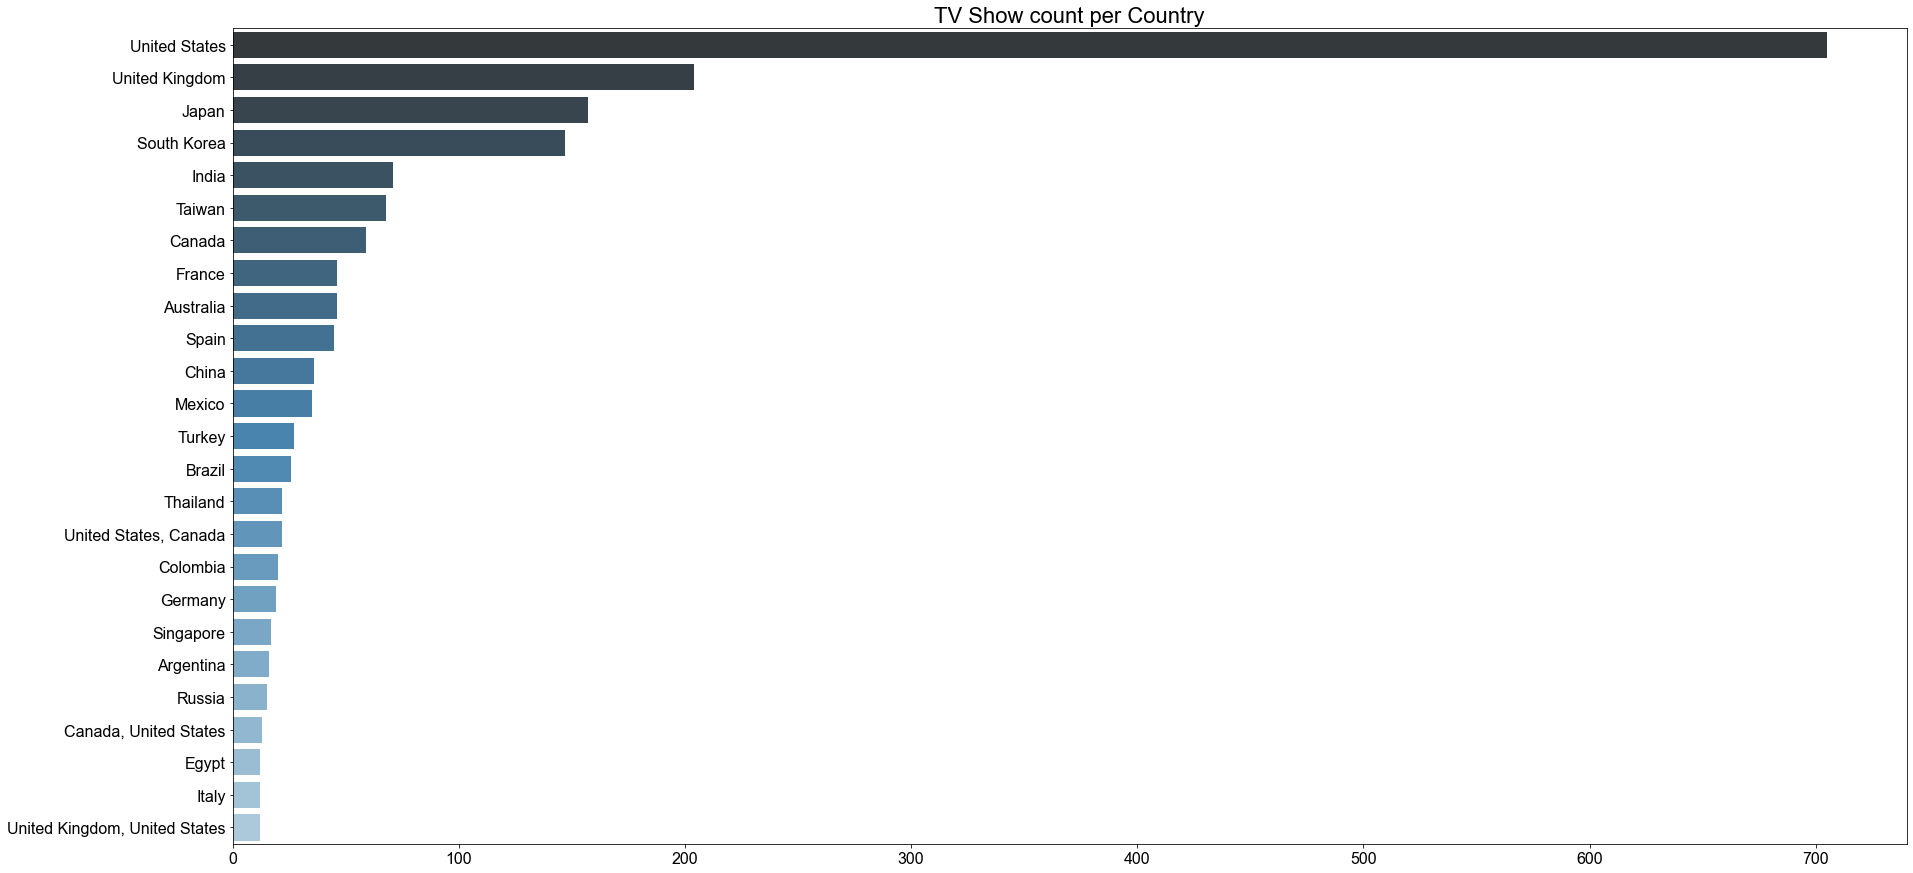

In [13]:
plt.figure(figsize = (30,15))
plt.title('TV Show count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = tv_country.index, x = tv_country.values, palette="Blues_d")
sb.set_style('white')
plt.show

In [14]:
movie_country = movies['country'].value_counts()[movies['country'].value_counts(normalize=True)>0.005]
movie_country_list = list(movie_country.index)

<function matplotlib.pyplot.show(close=None, block=None)>

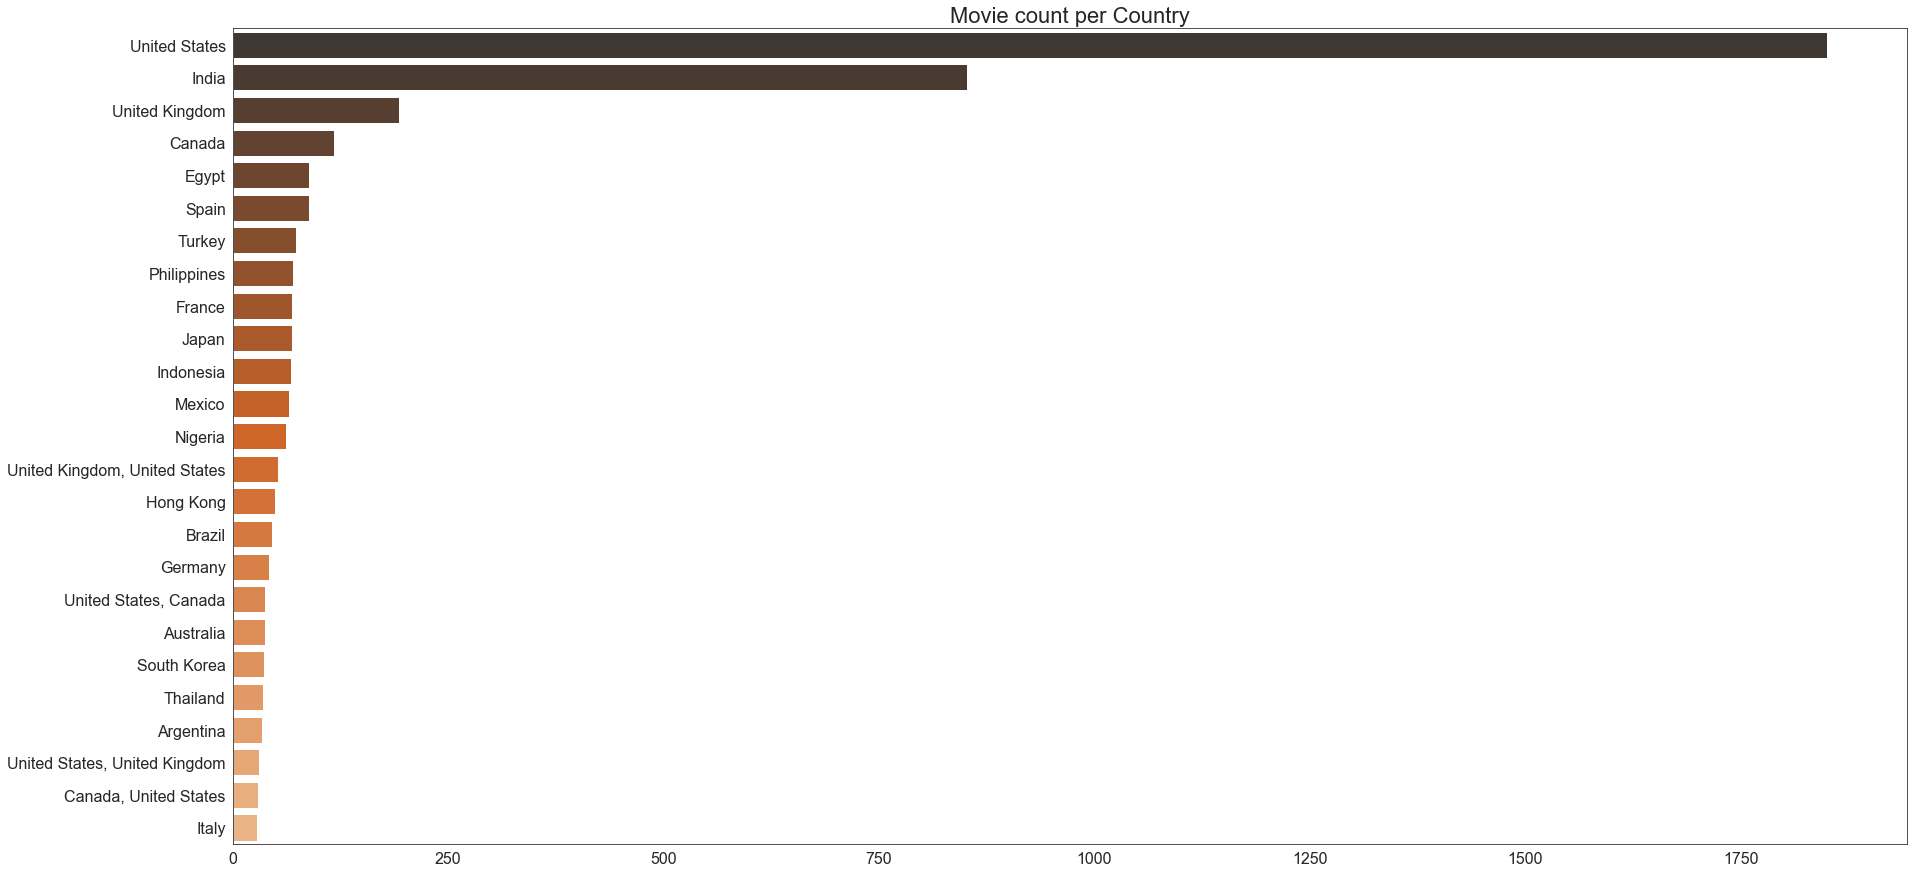

In [15]:
plt.figure(figsize = (30,15))
plt.title('Movie count per Country', fontsize=22)
plt.tick_params(labelsize = 16)
sb.barplot(y = movie_country.index, x = movie_country.values, palette="Oranges_d")
sb.set_style('white')
plt.show

In [16]:
# number of tv shows
tv_shows['type'].value_counts()

TV Show    2410
Name: type, dtype: int64

In [17]:
# number of movies
movies['type'].value_counts()

Movie    5377
Name: type, dtype: int64

In [18]:
# removing 'min' from duration so I can use as numeric and average
movies['duration'] = movies['duration'].replace({'min':''}, regex=True)

/Users/cameronmeadows/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
movies['duration'] = pd.to_numeric(movies['duration'])

/Users/cameronmeadows/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
tvrelease_year = tv_shows['release_year'].value_counts().sort_index()
print(tvrelease_year.head())
movierelease_year = movies['release_year'].value_counts().sort_index()
print(movierelease_year.head())

1925    1
1946    1
1963    1
1967    1
1968    1
Name: release_year, dtype: int64
1942    2
1943    3
1944    3
1945    3
1946    1
Name: release_year, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

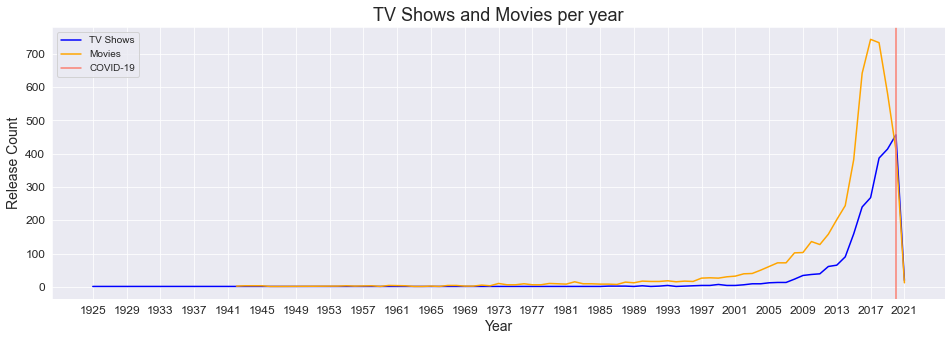

In [21]:
plt.figure(figsize = (16, 5))
sb.set_style('darkgrid')
plt.plot(tvrelease_year.index, tvrelease_year.values, color = 'b', label = 'TV Shows')
plt.plot(movierelease_year.index, movierelease_year.values, color = 'orange', label = 'Movies')

# showing the drop-off in production during 2020 due to COVID
plt.axvline(x = 2020, color = 'salmon', label = 'COVID-19')

plt.xticks(list(range(1925, 2022, 4)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('TV Shows and Movies per year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Release Count', fontsize = 14)
plt.legend()
plt.show

In [22]:
tv_added = tv_shows['year'].value_counts().sort_index()
movie_added = movies['year'].value_counts().sort_index()

<function matplotlib.pyplot.show(close=None, block=None)>

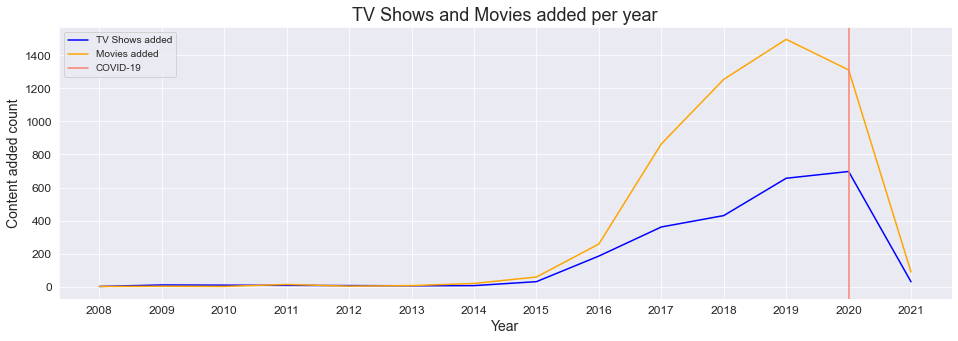

In [23]:
plt.figure(figsize = (16, 5))
sb.set_style('darkgrid')
plt.plot(tv_added.index, tv_added.values, color = 'b', label = 'TV Shows added')
plt.plot(movie_added.index, movie_added.values, color = 'orange', label = 'Movies added')

# showing the drop-off in production during 2020 due to COVID
plt.axvline(x = 2020, color = 'salmon', label = 'COVID-19')

plt.xticks(list(range(2008, 2022, 1)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('TV Shows and Movies added per year', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Content added count', fontsize = 14)
plt.legend()
plt.show

In [24]:
# df for release year and duration
rel_dur = movies[['release_year','duration']]

In [25]:
# average duration per release year
avg_dur = rel_dur.groupby(pd.Grouper(key='release_year')).mean()
avg_dur = avg_dur.sort_index()

<function matplotlib.pyplot.show(close=None, block=None)>

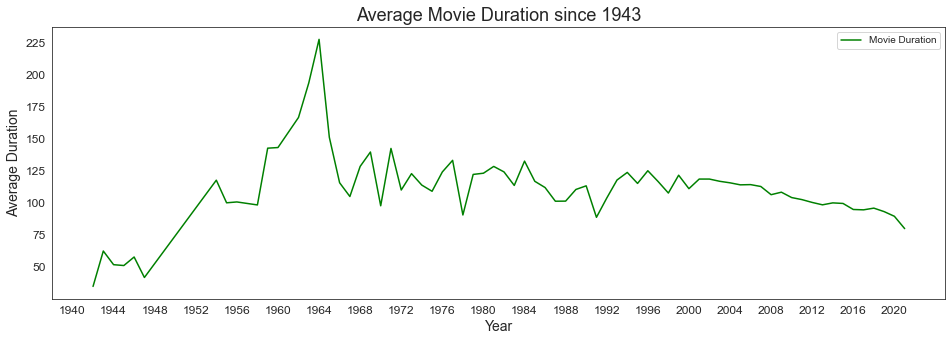

In [26]:
plt.figure(figsize = (16, 5))
sb.set_style('white')
plt.plot(avg_dur.index, avg_dur.values, color = 'green', label = 'Movie Duration')

plt.xticks(list(range(1940, 2022, 4)), fontsize = 12)
plt.yticks(fontsize = 12)
plt.title('Average Movie Duration since 1943', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Average Duration', fontsize = 14)
plt.legend()
plt.show

In [28]:
# rating df with all ratings as individual columns
rat_df = movies[['country', 'rating']]
rat_df.dropna()
rat_df.loc[:,'TV-MA'] = np.where(rat_df['rating']=='TV-MA', 1, 0)
rat_df.loc[:,'TV-14'] = np.where(rat_df['rating']=='TV-14', 1, 0)
rat_df.loc[:,'R'] = np.where(rat_df['rating']=='R', 1, 0)
rat_df.loc[:,'TV-PG'] = np.where(rat_df['rating']=='TV-PG', 1, 0)
rat_df.loc[:,'PG-13'] = np.where(rat_df['rating']=='PG-13', 1, 0)
rat_df.loc[:,'PG'] = np.where(rat_df['rating']=='PG', 1, 0)
rat_df.loc[:,'TV-Y'] = np.where(rat_df['rating']=='TV-Y', 1, 0)
rat_df.loc[:,'TV-G'] = np.where(rat_df['rating']=='TV-G', 1, 0)
rat_df.loc[:,'TV-Y7'] = np.where(rat_df['rating']=='TV-Y7', 1, 0)
rat_df.loc[:,'NR'] = np.where(rat_df['rating']=='NR', 1, 0)
rat_df.loc[:,'G'] = np.where(rat_df['rating']=='G', 1, 0)
rat_df.loc[:,'Total'] = rat_df.sum(numeric_only=True, axis=1)

/Users/cameronmeadows/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/cameronmeadows/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [29]:
# grouping country to sum each rating
rat_country = rat_df.groupby(pd.Grouper(key='country')).sum()

In [30]:
rat_country = rat_country.sort_values(by=['Total'], ascending = False)
# top 20 countries and their ratings
rat_country[:20]

,TV-MA,TV-14,R,TV-PG,PG-13,PG,TV-Y,TV-G,TV-Y7,NR,G,Total
country,,,,,,,,,,,,
United States,583,200,364,143,227,144,38,41,42,33,29,1844
India,201,497,2,124,4,3,0,6,8,5,0,850
United Kingdom,81,28,31,27,7,2,4,9,1,3,0,193
Canada,41,11,16,14,3,8,12,6,3,2,1,117
Spain,74,8,2,2,1,1,1,0,0,0,0,89
Egypt,25,60,0,4,0,0,0,0,0,0,0,89
Turkey,33,28,0,8,0,0,0,1,0,3,0,73
Philippines,23,34,1,8,0,0,0,4,0,0,0,70
Japan,21,15,0,21,3,5,1,0,3,0,0,69


In [32]:
# percent of ratings per country
per_country = rat_country
per_country['TV-MA'] = (rat_country['TV-MA']/rat_country['Total'])
per_country['TV-14'] = (rat_country['TV-14']/rat_country['Total'])
per_country['R'] = (rat_country['R']/rat_country['Total'])
per_country['TV-PG'] = (rat_country['TV-PG']/rat_country['Total'])
per_country['PG-13'] = (rat_country['PG-13']/rat_country['Total'])
per_country['PG'] = (rat_country['PG']/rat_country['Total'])
per_country['TV-Y'] = (rat_country['TV-Y']/rat_country['Total'])
per_country['TV-G'] = (rat_country['TV-G']/rat_country['Total'])
per_country['TV-Y7'] = (rat_country['TV-Y7']/rat_country['Total'])
per_country['NR'] = (rat_country['NR']/rat_country['Total'])
per_country['G'] = (rat_country['G']/rat_country['Total'])
per_country['Total'] = 1

In [36]:
per_country[:20]

,TV-MA,TV-14,R,TV-PG,PG-13,PG,TV-Y,TV-G,TV-Y7,NR,G,Total
country,,,,,,,,,,,,
United States,0.316161,0.108460,0.197397,0.077549,0.123102,0.078091,0.020607,0.022234,0.022777,0.017896,0.015727,1
India,0.236471,0.584706,0.002353,0.145882,0.004706,0.003529,0.000000,0.007059,0.009412,0.005882,0.000000,1
United Kingdom,0.419689,0.145078,0.160622,0.139896,0.036269,0.010363,0.020725,0.046632,0.005181,0.015544,0.000000,1
Canada,0.350427,0.094017,0.136752,0.119658,0.025641,0.068376,0.102564,0.051282,0.025641,0.017094,0.008547,1
Spain,0.831461,0.089888,0.022472,0.022472,0.011236,0.011236,0.011236,0.000000,0.000000,0.000000,0.000000,1
Egypt,0.280899,0.674157,0.000000,0.044944,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1
Turkey,0.452055,0.383562,0.000000,0.109589,0.000000,0.000000,0.000000,0.013699,0.000000,0.041096,0.000000,1
Philippines,0.328571,0.485714,0.014286,0.114286,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.000000,1
Japan,0.304348,0.217391,0.000000,0.304348,0.043478,0.072464,0.014493,0.000000,0.043478,0.000000,0.000000,1


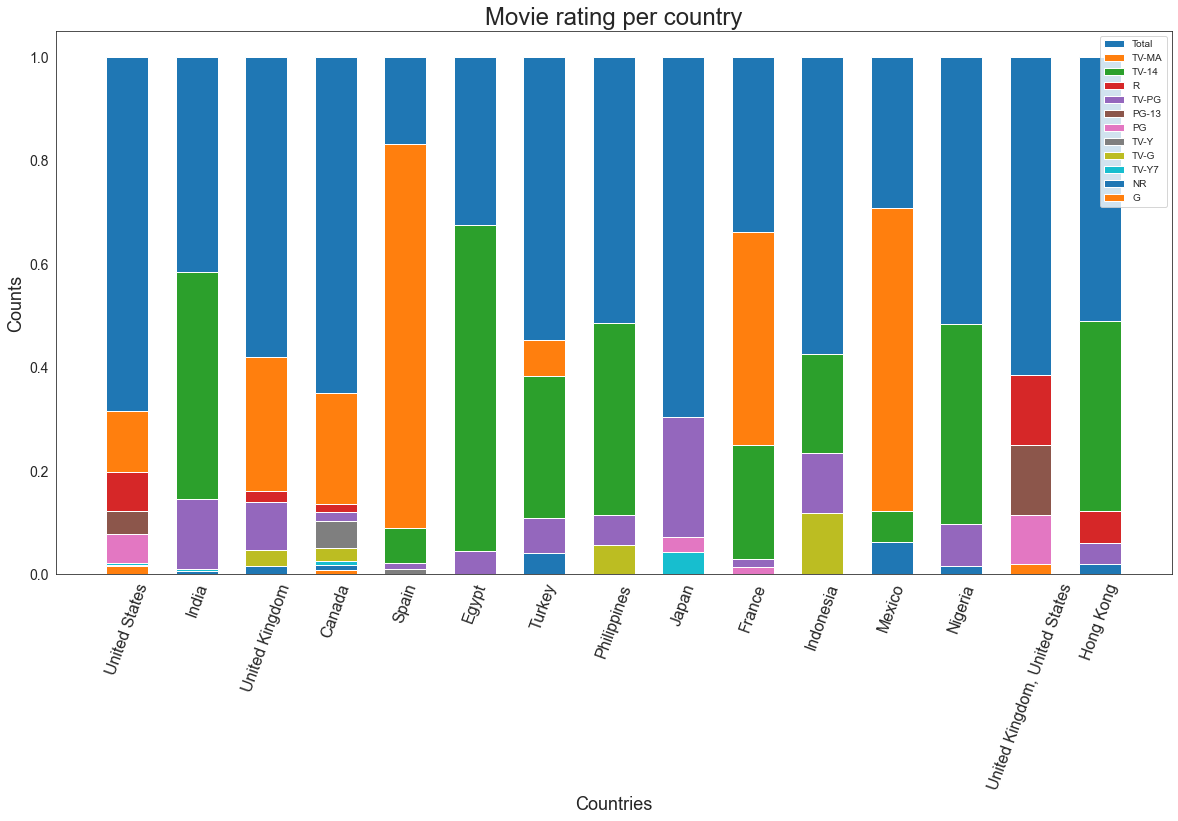

In [35]:
labels = per_country.index[:15]

fig, ax = plt.subplots()

ax.bar(labels, per_country['Total'][:15], .6, label="Total")
ax.bar(labels, per_country['TV-MA'][:15], .6, label='TV-MA')
ax.bar(labels, per_country['TV-14'][:15], .6, label='TV-14')
ax.bar(labels, per_country['R'][:15], .6, label='R')
ax.bar(labels, per_country['TV-PG'][:15], .6, label='TV-PG')
ax.bar(labels, per_country['PG-13'][:15], .6, label='PG-13')
ax.bar(labels, per_country['PG'][:15], .6, label='PG')
ax.bar(labels, per_country['TV-Y'][:15], .6, label='TV-Y')
ax.bar(labels, per_country['TV-G'][:15], .6, label='TV-G')
ax.bar(labels, per_country['TV-Y7'][:15], .6, label='TV-Y7')
ax.bar(labels, per_country['NR'][:15], .6, label='NR')
ax.bar(labels, per_country['G'][:15], .6, label='G')


ax.set_ylabel('Counts', fontsize = 18)
ax.set_xlabel("Countries", fontsize = 18)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 16, rotation = 70)
ax.set_title('Movie rating per country', fontsize = 24)
ax.legend()

plt.gcf().set_size_inches(20,10)
plt.show()

## Final Thoughts:
Given the Covid-19 pandemic it seems like Netflix worked to bring more TV-Shows to their audience, while there was an obvious drop in 2020 productions released.  
It is always interesting to see the drop off in movie duration over the years as well, and it seems to still be trending downwards.  
No surprise that the U.S leads in production, it was very cool to see how the ratings spit up between the countries,  where the U.S was heavy in TV-MA but fairly spread out between other ratings where other countries like Spain had 83% of their movies were rated TV-MA.